# Tutorial TensorFlow DataCamp

Objetivo: Classificar placas de trânsito de acordo com seus labels

Tutorial original: https://www.datacamp.com/community/tutorials/tensorflow-tutorial

In [1]:
import tensorflow as tf
from skimage import transform
from skimage import data
import matplotlib.pyplot as plt
import os
import numpy as np
from skimage.color import rgb2gray
import random
from __future__ import division

In [2]:
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

result = tf.multiply(x1, x2)


with tf.Session() as sess:
  output = sess.run(result)
  print(output)

[ 5 12 21 32]


In [3]:
def load_data(data_dir):
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(data.imread(f))
            labels.append(int(d))
    return images, labels

ROOT_PATH = "/home/caio/tensorflow_data/"
train_data_dir = os.path.join(ROOT_PATH, "Training")
test_data_dir = os.path.join(ROOT_PATH, "Testing")

images, labels = load_data(train_data_dir)

In [4]:
images_array = np.array(images)
labels_array = np.array(labels)

# Print the `images` dimensions
print(images_array.ndim)

# Print the number of `images`'s elements
print(images_array.size)

images_array[0]

# Print the `labels` dimensions
print(labels_array.ndim)

# Print the number of `labels`'s elements
print(labels_array.size)

# Count the number of labels
print(len(set(labels_array)))

1
4575
1
4575
62


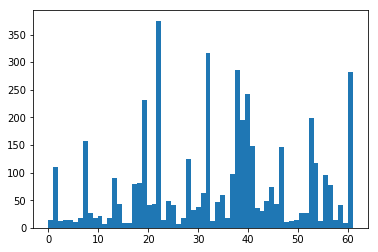

In [5]:
# Make a histogram with 62 bins of the `labels` data
plt.hist(labels, 62)

# Show the plot
plt.show()

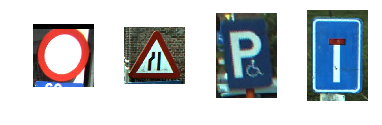

In [6]:
# Determine the (random) indexes of the images that you want to see 
traffic_signs = [20, 2, 200, 4000]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

Imprimindo o shape das matrizes que representam as imagens

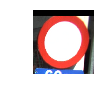

shape: (201, 192, 3), min: 0, max: 255


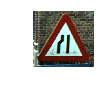

shape: (195, 211, 3), min: 0, max: 255


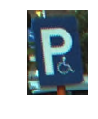

shape: (95, 68, 3), min: 0, max: 255


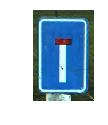

shape: (155, 104, 3), min: 2, max: 255


In [7]:
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))

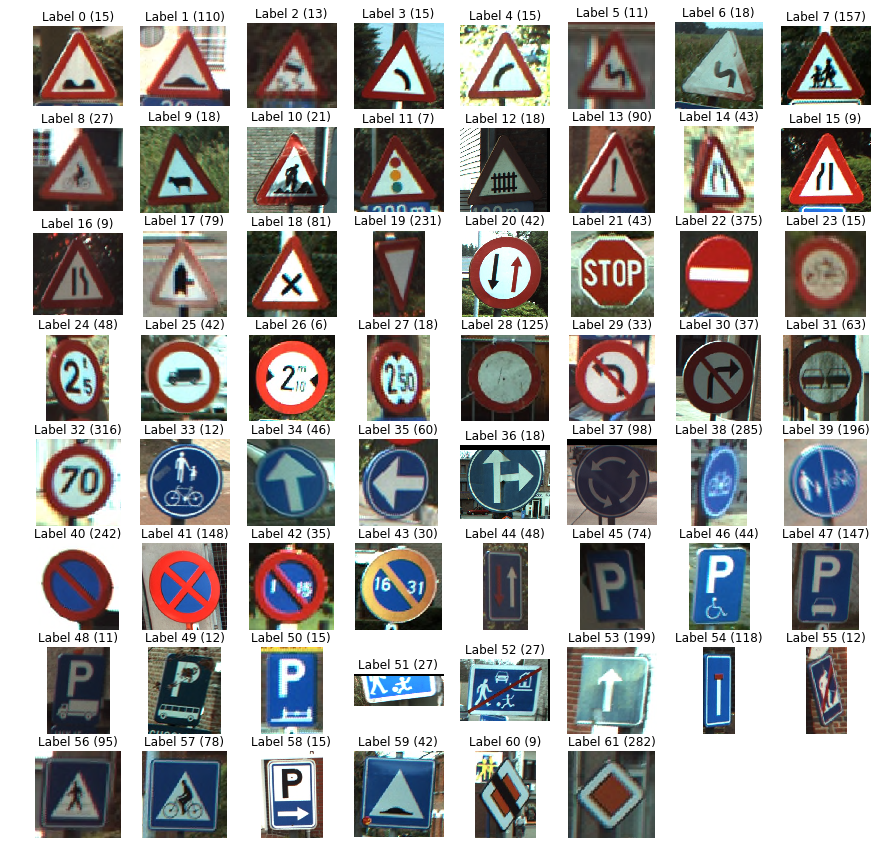

In [8]:
unique_labels = set(labels)

plt.figure(figsize=(15,15))

i = 1

for label in unique_labels:
    image = images[labels.index(label)]
    plt.subplot(8,8,i)
    plt.axis('off')
    plt.title("Label {0} ({1})".format(label, labels.count(label)))
    i += 1
    plt.imshow(image)
plt.show()

# Extraindo features e normalizando os dados

Redimensionando as imagens para imagens de mesmo tamanho

/home/caio/tensorflow/local/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


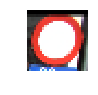

shape: (28, 28, 3), min: 0.0, max: 1.0


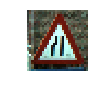

shape: (28, 28, 3), min: 0.00140306122449, max: 1.0


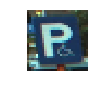

shape: (28, 28, 3), min: 0.0233293317327, max: 0.999079631853


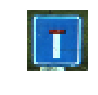

shape: (28, 28, 3), min: 0.0469087635054, max: 1.0


In [9]:
images28 = [transform.resize(image, (28, 28)) for image in images]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images28[traffic_signs[i]].shape, 
                                                  images28[traffic_signs[i]].min(), 
                                                  images28[traffic_signs[i]].max()))

Convertendo as imagens para grayscale

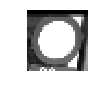

shape: (28, 28), min: 0.0, max: 1.0


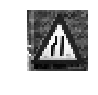

shape: (28, 28), min: 0.0239958242047, max: 0.982448057348


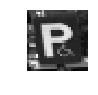

shape: (28, 28), min: 0.0630141306523, max: 0.944440057023


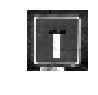

shape: (28, 28), min: 0.128687619548, max: 0.973927156363


In [10]:
images28 = np.array(images28)

images28 = rgb2gray(images28)

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images28[traffic_signs[i]].shape, 
                                                  images28[traffic_signs[i]].min(), 
                                                  images28[traffic_signs[i]].max()))

# Deep Learning With TensorFlow

In [11]:
#iniciando placeholders
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# Flatten the input data
images_flat = tf.contrib.layers.flatten(x)

# Fully connected layer
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

# Define a loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))

# Define an optimizer
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# Convert logits to label indexes
correct_pred = tf.argmax(logits, 1)

# Define an accuracy metric
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

('images_flat: ', <tf.Tensor 'Flatten/flatten/Reshape:0' shape=(?, 784) dtype=float32>)
('logits: ', <tf.Tensor 'fully_connected/Relu:0' shape=(?, 62) dtype=float32>)
('loss: ', <tf.Tensor 'Mean:0' shape=() dtype=float32>)
('predicted_labels: ', <tf.Tensor 'ArgMax:0' shape=(?,) dtype=int64>)


In [12]:
tf.set_random_seed(1234)
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(201):
    print('EPOCH', i)
    _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images28, y: labels})
    if i % 10 == 0:
        print("Loss: ", loss)
    print('DONE WITH EPOCH')

('EPOCH', 0)
('Loss: ', <tf.Tensor 'Mean:0' shape=() dtype=float32>)
DONE WITH EPOCH
('EPOCH', 1)
DONE WITH EPOCH
('EPOCH', 2)
DONE WITH EPOCH
('EPOCH', 3)
DONE WITH EPOCH
('EPOCH', 4)
DONE WITH EPOCH
('EPOCH', 5)
DONE WITH EPOCH
('EPOCH', 6)
DONE WITH EPOCH
('EPOCH', 7)
DONE WITH EPOCH
('EPOCH', 8)
DONE WITH EPOCH
('EPOCH', 9)
DONE WITH EPOCH
('EPOCH', 10)
('Loss: ', <tf.Tensor 'Mean:0' shape=() dtype=float32>)
DONE WITH EPOCH
('EPOCH', 11)
DONE WITH EPOCH
('EPOCH', 12)
DONE WITH EPOCH
('EPOCH', 13)
DONE WITH EPOCH
('EPOCH', 14)
DONE WITH EPOCH
('EPOCH', 15)
DONE WITH EPOCH
('EPOCH', 16)
DONE WITH EPOCH
('EPOCH', 17)
DONE WITH EPOCH
('EPOCH', 18)
DONE WITH EPOCH
('EPOCH', 19)
DONE WITH EPOCH
('EPOCH', 20)
('Loss: ', <tf.Tensor 'Mean:0' shape=() dtype=float32>)
DONE WITH EPOCH
('EPOCH', 21)
DONE WITH EPOCH
('EPOCH', 22)
DONE WITH EPOCH
('EPOCH', 23)
DONE WITH EPOCH
('EPOCH', 24)
DONE WITH EPOCH
('EPOCH', 25)
DONE WITH EPOCH
('EPOCH', 26)
DONE WITH EPOCH
('EPOCH', 27)
DONE WITH EPOCH
('

Evaluating Your Neural Network

Selecionando aleatoriamente 10 samples para avaliar a rede neural

In [13]:
# Pick 10 random images
sample_indexes = random.sample(range(len(images28)), 10)
sample_images = [images28[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = sess.run([correct_pred], feed_dict={x:sample_images})[0]

# Print the real and predicted labels
print(sample_labels)
print(predicted)

[30, 28, 56, 61, 39, 59, 17, 38, 7, 40]
[40 31 56 61 39 59  7 38  7 40]


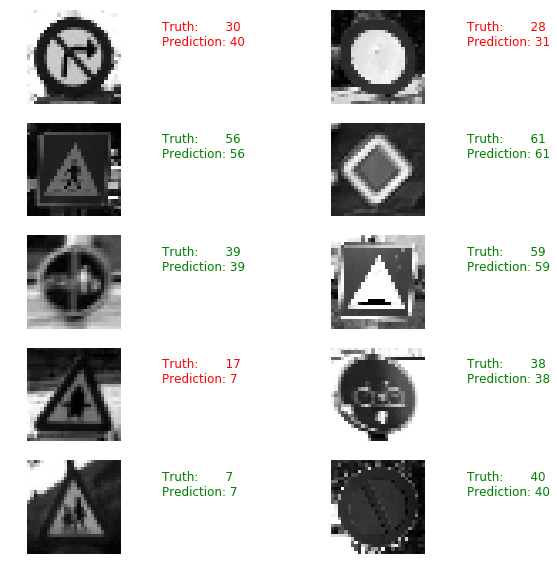

In [14]:
fig = plt.figure(figsize=(10, 10))

for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2, 1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:       {0}\nPrediction: {1}".format(truth, prediction),
            fontsize=12, color=color)
    plt.imshow(sample_images[i],  cmap="gray")
    
plt.show()

# Testando a rede com os dados de teste

In [15]:
# Load the test data
test_images, test_labels = load_data(test_data_dir)

# Transform the images to 28 by 28 pixels
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]

# Convert to grayscale
test_images28 = rgb2gray(np.array(test_images28))

# Run predictions against the full test set.
predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]

# Calculate correct matches 
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

# Calculate the accuracy
accuracy = match_count / len(test_labels)

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))

Accuracy: 0.412


In [ ]:
sess.close()